# 코로나 데이터 분석
- 정부 정책에 따라 코로나 사태로 인한 대응 정책으로 해외 입국자를 거절했던 (대만, 호주) 의 일일 확진자 수와 해외입국자를 받아 들이는 대한민국의 일일확진자 수를 분석해 보고자 한다. 
- 대만 : 지속적인 해외입국 금지 정책
- 호주 : 허가-> 금지 -> 허가
- 대한 민국 : 허가

In [15]:
import pandas as pd
import numpy as np

import webbrowser
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']='False'  #한글 쓸수 있게

In [20]:
filepath = r"C:\Users\student\2020_python\0729_Data_project\world_covid\covid_19_data.csv" #데이터 파일 불러오기 출처 : 캐글

world_covid_df=pd.read_csv(filepath)
world_covid_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
68553,68554,07/20/2020,Zaporizhia Oblast,Ukraine,2020-07-21 04:38:46,678.0,20.0,551.0
68554,68555,07/20/2020,Zeeland,Netherlands,2020-07-21 04:38:46,791.0,69.0,0.0
68555,68556,07/20/2020,Zhejiang,Mainland China,2020-07-21 04:38:46,1270.0,1.0,1267.0
68556,68557,07/20/2020,Zhytomyr Oblast,Ukraine,2020-07-21 04:38:46,1602.0,34.0,1251.0


In [150]:
taiwan_df=world_covid_df['Country/Region']=='Taiwan'

taiwan_covid_df=world_covid_df[taiwan_df]
taiwan_covid_df=taiwan_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]  # 대만 확진자 정보를 담은 데이터 프레임

taiwan_covid=taiwan_covid_df.copy()
taiwan_covid['Day_Confirmed']=0
taiwan_covid=taiwan_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()
taiwan_covid
# taiwan_covid = taiwan_covid.reset_index(drop=True)

confirmed_list=taiwan_covid[['Confirmed']]

one_list=[]
for i in range(1,len(confirmed_list)):
    rest= int(taiwan_covid.loc[i]['Confirmed']-taiwan_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,taiwan_covid.loc[0]['Day_Confirmed'])

# taiwan_covid['Day_Confirmed']=one_list

# taiwan_covid=taiwan_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()
taiwan_covid.tail(30)

,ObservationDate,Country/Region,Confirmed,Day_Confirmed
151,06/21/2020,Taiwan,446.0,0
152,06/22/2020,Taiwan,446.0,0
153,06/23/2020,Taiwan,446.0,0
154,06/24/2020,Taiwan,446.0,0
155,06/25/2020,Taiwan,447.0,0
156,06/26/2020,Taiwan,447.0,0
157,06/27/2020,Taiwan,447.0,0
158,06/28/2020,Taiwan,447.0,0
159,06/29/2020,Taiwan,447.0,0
160,06/30/2020,Taiwan,447.0,0


In [151]:
Aus_df=world_covid_df['Country/Region']=='Australia'

Aus_covid_df=world_covid_df[Aus_df]
Aus_covid_df=Aus_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]   # 호주 확진자 정보를 담은 데이터 프레임

Aus_covid=Aus_covid_df.copy()
Aus_covid['Day_Confirmed']=0
Aus_covid=Aus_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()
Aus_covid
# Aus_covid = Aus_covid.reset_index(drop=True)

confirmed_list=Aus_covid[['Confirmed']]

one_list=[]
for i in range(1,len(confirmed_list)):
    rest= int(Aus_covid.loc[i]['Confirmed']-Aus_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,Aus_covid.loc[0]['Day_Confirmed'])

Aus_covid['Day_Confirmed']=one_list
Aus_covid.tail(30)
# Aus_covid=Aus_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()
# Aus_covid.tail(30)

,ObservationDate,Country/Region,Confirmed,Day_Confirmed
149,06/21/2020,Australia,7474.0,13
150,06/22/2020,Australia,7492.0,18
151,06/23/2020,Australia,7521.0,29
152,06/24/2020,Australia,7558.0,37
153,06/25/2020,Australia,7595.0,37
154,06/26/2020,Australia,7601.0,6
155,06/27/2020,Australia,7686.0,85
156,06/28/2020,Australia,7764.0,78
157,06/29/2020,Australia,7834.0,70
158,06/30/2020,Australia,7920.0,86


In [158]:
korea_df=world_covid_df['Country/Region']=='South Korea'

korea_covid_df=world_covid_df[korea_df]
korea_covid_df=korea_covid_df[['ObservationDate', 'Country/Region', 'Confirmed']]   # 대한민국 확진자 정보를 담은 데이터 프레임

korea_covid=korea_covid_df.copy()
korea_covid['Day_Confirmed']=0
korea_covid=korea_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()
# korea_covid = korea_covid.reset_index(drop=True)

confirmed_list=korea_covid[['Confirmed']]

one_list=[]
for i in range(1,len(confirmed_list)):
    rest= abs(korea_covid.loc[i]['Confirmed']-korea_covid.loc[i-1]['Confirmed'])
    one_list.append(rest)
one_list.insert(0,korea_covid.loc[0]['Day_Confirmed'])

korea_covid['Day_Confirmed']=one_list

# korea_covid=korea_covid.groupby(['ObservationDate','Country/Region'],as_index=False).sum()
korea_covid.head(50100)


,ObservationDate,Country/Region,Confirmed,Day_Confirmed
0,01/22/2020,South Korea,1.0,0.0
1,01/23/2020,South Korea,1.0,0.0
2,01/24/2020,South Korea,2.0,1.0
3,01/25/2020,South Korea,2.0,0.0
4,01/26/2020,South Korea,3.0,1.0
...,...,...,...,...
176,07/16/2020,South Korea,13672.0,60.0
177,07/17/2020,South Korea,13711.0,39.0
178,07/18/2020,South Korea,13745.0,34.0
179,07/19/2020,South Korea,13771.0,26.0


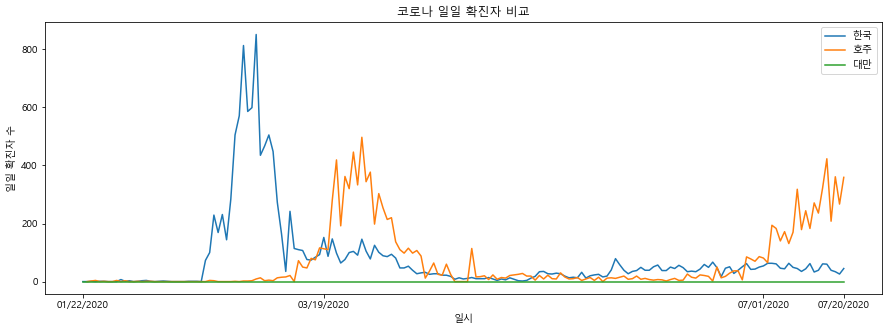

In [172]:
#일일 확진자 비교 그래프 



# tai_list=
# aus_list=
# df
ax = plt.subplot()
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(korea_covid['ObservationDate'],korea_covid['Day_Confirmed'])
plt.plot(Aus_covid['ObservationDate'],Aus_covid['Day_Confirmed'])
plt.plot(taiwan_covid['ObservationDate'],taiwan_covid['Day_Confirmed'])
plt.xlabel('일시')
plt.ylabel('일일 확진자 수')
plt.title("코로나 일일 확진자 비교")
plt.legend(["한국","호주","대만"])
# plt.xticks(rotation=90)

ax.set_xticks(['01/22/2020','03/19/2020', '07/01/2020', '07/20/2020'])

#  2020.3.19(목) 현지시간 21시부터 모든 외국인의 호주 입국을 금지하겠다고 발표하였습니다.

plt.show()